<h1><center>IRIS FLOWERS CLASSIFICATION</center></h1>


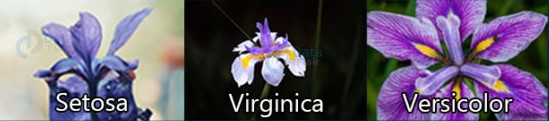

## <code style="background:PowderBlue;color:black">TASK - Predict the different species of flowers on the length of there petals and sepals

### <code style="background:Lavender;color:black">Importing Necessary Libraries

In [612]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [613]:
### Importing the dataset

In [614]:
iris_df=pd.read_csv("C:\\Users\\saism\\OneDrive\\Documents\\Bharat Internship\\Iris Flowers Prediction\\iris.csv")


In [615]:
iris_df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


### The dataset contains 150 rows and 6 columns.The dataset contains measurements of Sepal Length,Sepal Width,Petal Length and Petal Width for 3 different species: Setosa,Versicolor,Virginica

In [616]:
iris_df.shape

(150, 6)

### <code style="background:Lavender;color:black">Exploratory Data Analysis(EDA)

In [617]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [618]:
### Statistics of the dataset

In [619]:
iris_df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [620]:
iris_df.isnull().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

> No Null Values are present in the dataset

In [621]:
iris_df["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

> Each class of Species have equal sample 

In [622]:
iris_df.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [623]:
### Dropping Unnamed column
iris_df=iris_df.drop(["Unnamed: 0"],axis=1)

In [624]:
iris_df.corr()

C:\Users\saism\AppData\Local\Temp\ipykernel_9856\1934569051.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.corr()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


C:\Users\saism\AppData\Local\Temp\ipykernel_9856\4030252326.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(),annot=True)


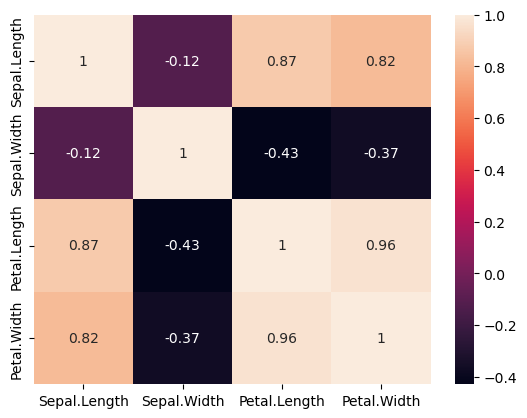

In [625]:
sns.heatmap(iris_df.corr(),annot=True)
plt.show()

> Petal length and width are positively correlated

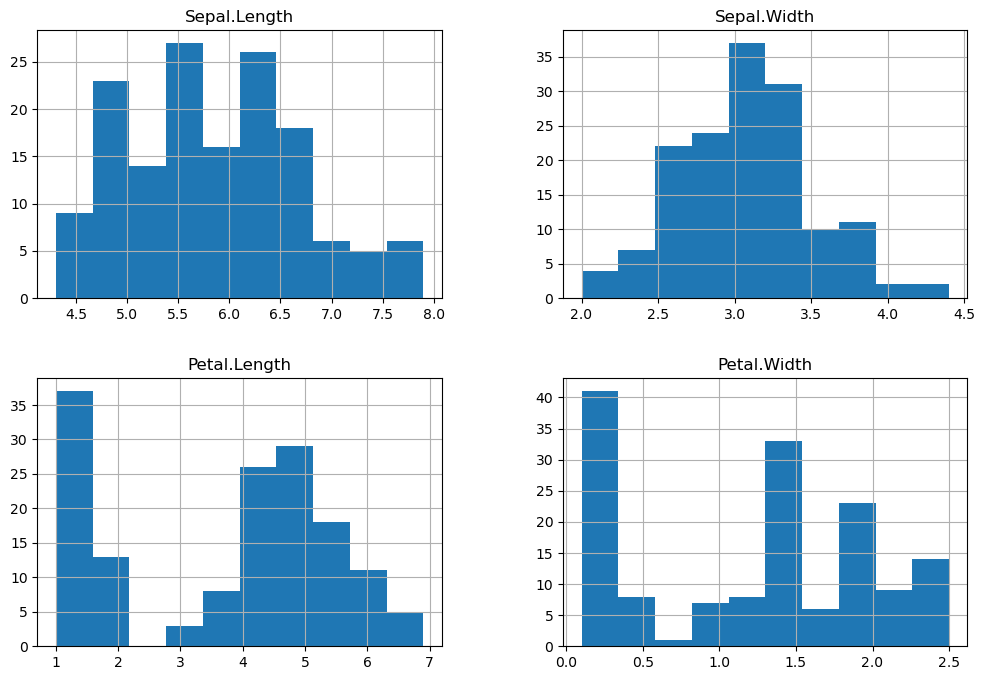

In [626]:
iris_df.hist(figsize=(12,8))
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

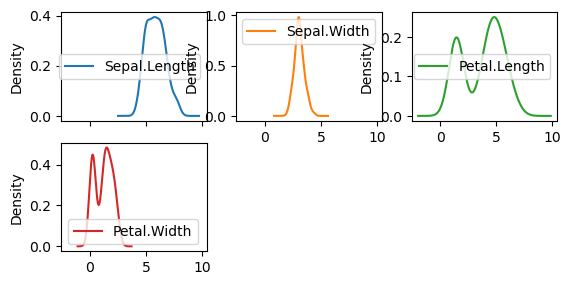

In [627]:
iris_df.plot(kind="density",subplots=True,layout=(3,3))


Sepal.Length       Axes(0.125,0.11;0.168478x0.77)
Sepal.Width     Axes(0.327174,0.11;0.168478x0.77)
Petal.Length    Axes(0.529348,0.11;0.168478x0.77)
Petal.Width     Axes(0.731522,0.11;0.168478x0.77)
dtype: object

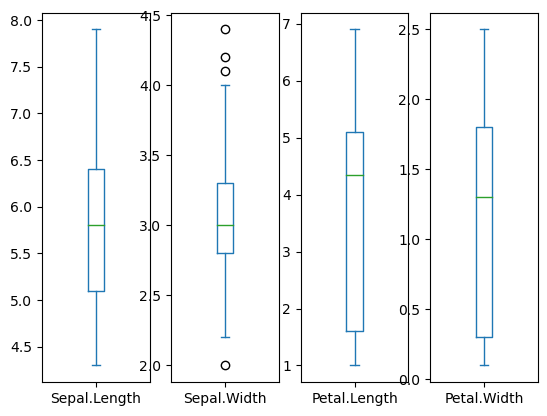

In [628]:
iris_df.plot(kind="box",subplots=True)

<Axes: xlabel='Species', ylabel='Sepal.Width'>

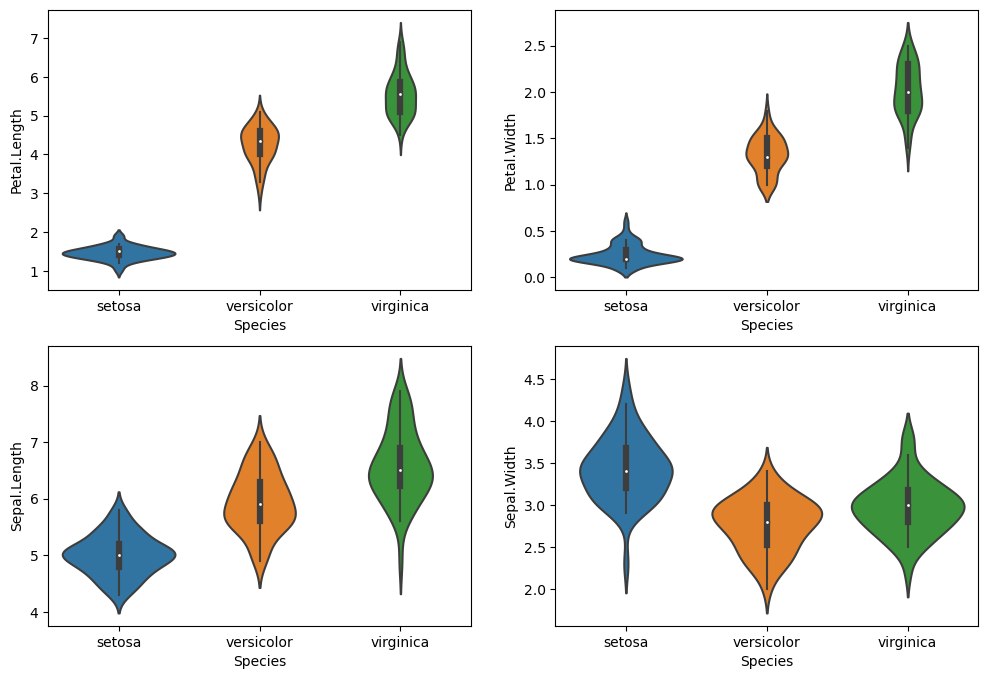

In [629]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="Petal.Length",data=iris_df)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="Petal.Width",data=iris_df)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="Sepal.Length",data=iris_df)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="Sepal.Width",data=iris_df)


<Axes: xlabel='Species', ylabel='Sepal.Width'>

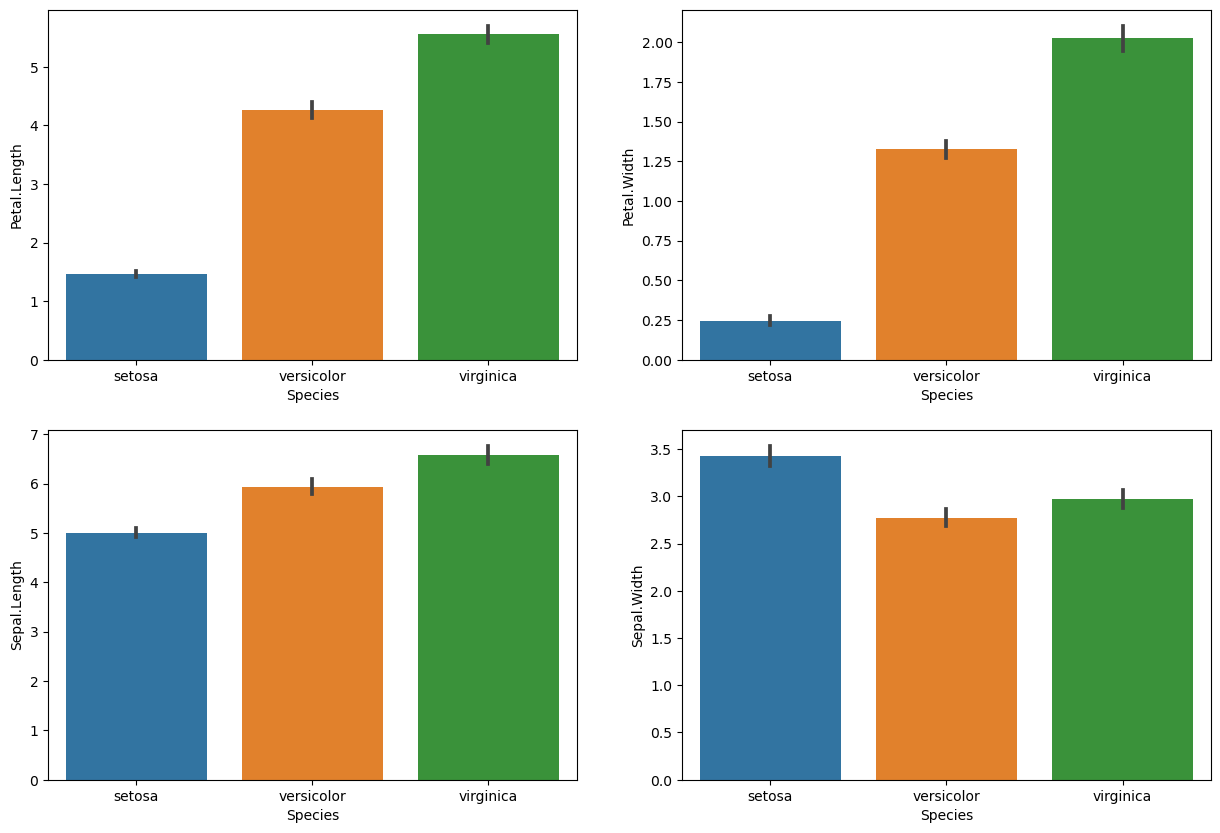

In [630]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x='Species',y='Petal.Length',data=iris_df)
plt.subplot(2,2,2)
sns.barplot(x='Species',y='Petal.Width',data=iris_df)
plt.subplot(2,2,3)
sns.barplot(x='Species',y='Sepal.Length',data=iris_df)
plt.subplot(2,2,4)
sns.barplot(x='Species',y='Sepal.Width',data=iris_df)

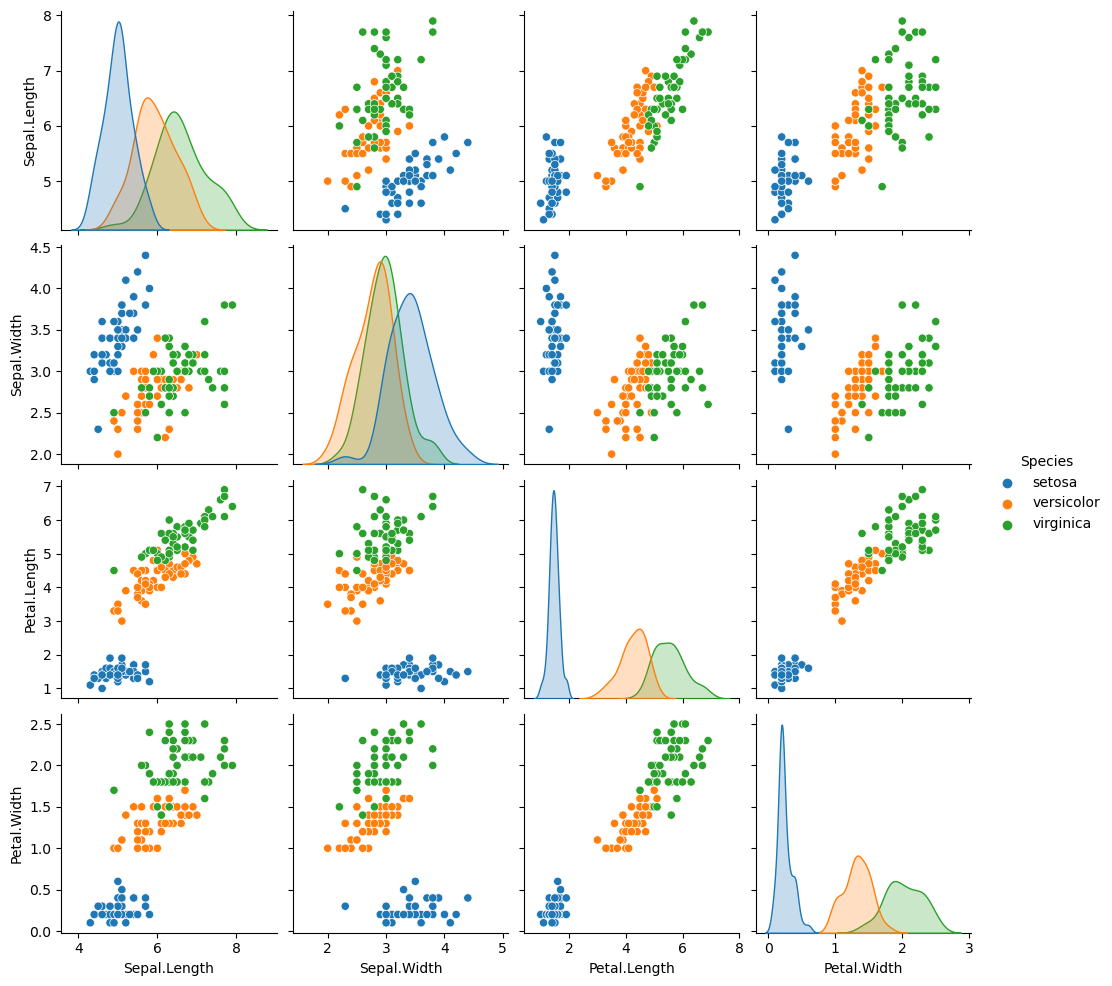

In [631]:
sns.pairplot(iris_df,hue="Species")

### <code style="background:Lavender;color:black">Train Test Split

In [632]:
from sklearn.model_selection import train_test_split

In [633]:
train, test = train_test_split(iris_df, test_size = 0.2)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [634]:
X_train = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
y_train = train.Species

X_test = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
y_test = test.Species

In [635]:
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
90,5.5,2.6,4.4,1.2
88,5.6,3.0,4.1,1.3
48,5.3,3.7,1.5,0.2
93,5.0,2.3,3.3,1.0
147,6.5,3.0,5.2,2.0


In [636]:
y_train.head()

90     versicolor
88     versicolor
48         setosa
93     versicolor
147     virginica
Name: Species, dtype: object

### <code style="background:Lavender;color:black">Model Training

## <code style="background:PowderBlue;color:black">Logistic Regression

In [637]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [638]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)


C:\Users\saism\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [639]:
Accuracy_LR=metrics.accuracy_score(y_pred_lr,y_test)

In [640]:
print("Logistic Regression Accuracy:",Accuracy_LR)

Logistic Regression Accuracy: 0.9666666666666667


In [641]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred_lr))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.93      0.96        14
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



## <code style="background:PowderBlue;color:black">Support Vector Machine(SVM)

In [642]:
from sklearn.svm import SVC


In [643]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)

In [644]:
Accuracy_SVM=metrics.accuracy_score(y_pred_svm,y_test)

In [645]:
print("SVM Accuracy:",Accuracy_SVM)

SVM Accuracy: 0.9666666666666667


In [646]:

print(classification_report(y_test,y_pred_svm))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.93      0.96        14
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



## <code style="background:PowderBlue;color:black">Decision Tree

In [647]:
from sklearn.tree import DecisionTreeClassifier

In [648]:
dt=DecisionTreeClassifier(criterion="entropy",random_state=7)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [649]:
Accuracy_DT=metrics.accuracy_score(y_pred_dt,y_test)

In [650]:
print("Decision Tree Accuracy:",Accuracy_DT)

Decision Tree Accuracy: 0.9333333333333333


In [651]:
print(classification_report(y_test,y_pred_dt))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.93      0.93      0.93        14
   virginica       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



## <code style="background:PowderBlue;color:brown">Models Accuracy Comparision

In [652]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machine', 'Decision Tree'],
    'Accuracy_Score': [Accuracy_LR,Accuracy_SVM,Accuracy_DT]})

In [653]:
acc_score = results.sort_values(by='Accuracy_Score', ascending=False)
print(acc_score)

                    Model  Accuracy_Score
0     Logistic Regression        0.966667
1  Support Vector Machine        0.966667
2           Decision Tree        0.933333


## <code style="background:lavender;color:brown">Observation: From the Accuracy Scores SVM and Logistic Regression performed better than Decision Tree